In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.preprocessing.image as img

In [2]:
train=img.ImageDataGenerator(rescale=1/255)
test=img.ImageDataGenerator(rescale=1/255)

path1=r"C:\Users\Soham\Desktop\dataset\dogscats\train"
train=train.flow_from_directory(path1,
                                 target_size=(64,64),
                                batch_size=100,
                               class_mode='binary')

path2=r"C:\Users\Soham\Desktop\dataset\dogscats\test1"
test=test.flow_from_directory(path2,
                             target_size=(64,64),
                              class_mode=None
                              
                             )

Found 23000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [3]:
print(train.class_indices)

{'cats': 0, 'dogs': 1}


In [4]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(7,7),strides=(2,2),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),strides=(2,2),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
          
model.fit(train,epochs=20)
model.save('my_model.h5')

Epoch 1/20
230/230 [==============================] - 413s 2s/step - loss: 0.6662 - accuracy: 0.5893
Epoch 2/20
230/230 [==============================] - 246s 1s/step - loss: 0.6074 - accuracy: 0.6669
Epoch 3/20
230/230 [==============================] - 221s 959ms/step - loss: 0.5692 - accuracy: 0.7063
Epoch 4/20
230/230 [==============================] - 162s 702ms/step - loss: 0.5431 - accuracy: 0.7266
Epoch 5/20
230/230 [==============================] - 209s 908ms/step - loss: 0.5136 - accuracy: 0.7476
Epoch 6/20
230/230 [==============================] - 106s 460ms/step - loss: 0.4766 - accuracy: 0.7720
Epoch 7/20
230/230 [==============================] - 62s 271ms/step - loss: 0.4537 - accuracy: 0.7864
Epoch 8/20
230/230 [==============================] - 62s 271ms/step - loss: 0.4187 - accuracy: 0.8068
Epoch 9/20
230/230 [==============================] - 62s 271ms/step - loss: 0.3933 - accuracy: 0.8252
Epoch 10/20
230/230 [==============================] - 64s 277ms/step - l

In [10]:
new_model=tf.keras.models.load_model('my_model.h5')
new_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

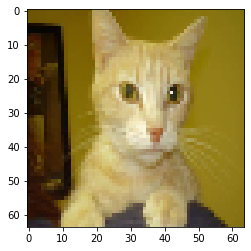

In [11]:
path=r"C:\Users\Soham\Desktop\dataset\dogscats\test1\1049.jpg"
test_img=img.load_img(path,target_size=(64,64))
plt.imshow(test_img)

In [12]:
test=img.img_to_array(test_img)
print(test.shape)
test=np.expand_dims(test,axis=0)
print(test.shape)
result=new_model.predict(test)
print(result.shape)
print(result[0][0])

if(result[0][0]==0):
    print("cat")
if(result[0][0]==1):
    print("dog")



(64, 64, 3)
(1, 64, 64, 3)
(1, 1)
0.0
cat


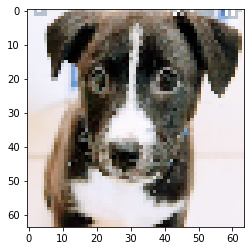

In [26]:
path=r"C:\Users\Soham\Desktop\dataset\digits\7.png"
test_img=img.load_img(path,target_size=(64,64))
plt.imshow(test_img)

In [28]:
test=img.img_to_array(test_img)
print(test.shape)
test=np.expand_dims(test,axis=0)
print(test.shape)
result=new_model.predict(test)
print(result.shape)
print(result[0][0])

if(result[0][0]==0):
    print("cat")
if(result[0][0]==1):
    print("dog")



(64, 64, 3)
(1, 64, 64, 3)
(1, 1)
1.0
dog
